In [23]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from getphone_functions_3 import is_healthy
from getphone_functions_9 import variable_breakdown,analyze_numbers

In [5]:
getphone = pd.read_csv('GetPhone_NoContact_Sample.csv')
wslive = pd.read_csv('WSLive_NoContact_Sample.csv')

In [6]:
wslive = wslive[['PHYSICIAN_ME_NUMBER', 'PHYSICIAN_FIRST_NAME', 'PHYSICIAN_MIDDLE_NAME',
       'PHYSICIAN_LAST_NAME', 'SUFFIX', 'DEGREE', 'OFFICE_ADDRESS_LINE_1',
       'OFFICE_ADDRESS_LINE_2', 'OFFICE_ADDRESS_CITY', 'OFFICE_ADDRESS_STATE',
       'OFFICE_ADDRESS_ZIP',
       'OFFICE_TELEPHONE']]

In [7]:
matched_df = pd.merge(wslive, getphone, left_on='OFFICE_TELEPHONE', right_on= 'Number').drop_duplicates(['PHYSICIAN_ME_NUMBER','OFFICE_TELEPHONE'])

In [57]:
matched_df.to_csv('GetPhone_Humach_Match.csv', index=False)

In [24]:
analyze_numbers(matched_df)

{'Address Matches': 172,
 'City Matches': 293,
 'ZipCode Matches': 226,
 'No Address': 6,
 'No Date': 1,
 'Relevant Name': 290,
 'Business Phone': 399,
 'Residential Phone': 87,
 'Low Quality': 176,
 'Medium Quality': 76,
 'High Quality': 241,
 'Mailable': 331,
 'Connected': 311,
 'Ported': 350,
 'Unknown Contact': 5,
 'Possibly Disconnected': 42,
 'Possibly Portable VOIP': 37,
 'Wireless': 7,
 'First Name Match': 44,
 'Last Name Match': 41,
 'Workplace Match': 20,
 'State Match': 391,
 'No Name': 6,
 'Relevant SIC': 233}

In [25]:
matched_df = matched_df.fillna('None')

In [26]:
variable_df = pd.DataFrame(variable_breakdown(matched_df))

In [62]:
matched_df

,PHYSICIAN_ME_NUMBER,PHYSICIAN_FIRST_NAME,PHYSICIAN_MIDDLE_NAME,PHYSICIAN_LAST_NAME,SUFFIX,DEGREE,OFFICE_ADDRESS_LINE_1,OFFICE_ADDRESS_LINE_2,OFFICE_ADDRESS_CITY,OFFICE_ADDRESS_STATE,...,Zipcode,City,State,PhoneType,QualityScore,Date,Notes,Provider,SICCode,SICDesc
0,4.706051e+09,EIMAN,None,JAHANGIR,None,None,CARDIOLOGY DEPARTMENT,1215 21ST AVE S,NASHVILLE,TN,...,None,None,None,RESIDENTIAL,MED,2013-11-17,"IsPorted,IsWireless",VERIZON WIRELESS-CA,None,None
1,4.814001e+09,SARAH,L,JONES,None,None,AUSTIN REGIONAL CLINIC,1807 W SLAUGHTER LN STE 490,AUSTIN,TX,...,78751,AUSTIN,TX,BUSINESS,MED,2003-12-11,"IsConnected,IsPorted",SOUTHWESTERN BELL,None,None
2,3.515961e+09,RACHAEL,None,GITTENS,None,None,CORNERSTONE OF MEDICAL ARTS CENTER,15905 UNION TPKE,FRESH MEADOWS,NY,...,11201,BROOKLYN,NY,BUSINESS,LOW,2017-02-01,IsPorted,CABLEVSN LGHTPATH NY,None,None
3,1.606781e+09,SCOTT,DAVID,GLAZER,None,None,KENOSHA DERMATOLOGY ASSOCIATES,3734 7TH ST STE 22,KENOSHA,WI,...,60089-2089,BUFFALO GROVE,IL,RESIDENTIAL,HIGH,2018-10-12,"IsMailable,IsConnected,IsPorted",COMCAST PHONE-IL,80110000,OFFICES AND CLINICS OF MEDICAL DOCTORS
4,3.509872e+09,GRACE,HELEN,THOMAS,None,None,AL DEPT OF PUBLIC HEALTH,201 MONROE ST STE 1382,MONTGOMERY,AL,...,36104,MONTGOMERY,AL,BUSINESS,LOW,None,None,BELLSOUTH SO CNTL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,7.480290e+10,MICHELLE,None,ABIS,None,None,# 1001,6511 SPRING BROOK AVE,RHINEBECK,NY,...,12572,RHINEBECK,NY,BUSINESS,LOW,2016-04-08,IsPorted,PAETEC COMM - NY,None,None
512,3.608111e+09,MATTHEW,LEIGHTON,DRAUGHON,None,None,# 104,3615 19TH ST,LUBBOCK,TX,...,79410-1230,LUBBOCK,TX,BUSINESS,LOW,2017-01-25,"IsMailable,IsPorted",TELEPORT COM DALLAS,None,None
513,4.201600e+09,JOSE,L,CANGIANO-RIVERA,None,None,URB LOS INGENIEROS,313 CALLE MANUEL DOMENECH STE 101,SAN JUAN,PR,...,00901,SAN JUAN,PR,RESIDENTIAL,LOW,2016-05-04,IsPorted,LIBERTY CABLEVSN-PR,None,None
514,3.844011e+09,ASLAM,MOHAMMED,KHAJA,None,None,RM 855N MC 796,912 S WOOD ST,CHICAGO,IL,...,60010-2542,LAKE BARRINGTON,IL,BUSINESS,HIGH,2013-12-06,"IsMailable,IsConnected,IsPorted","ACCESS ONE, INC IL",None,None


In [85]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(testyy)


In [66]:
testyy = testy.drop(columns = 'OFFICE_TELEPHONE')

In [86]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



Text(0, 0.5, 'Bad Score')

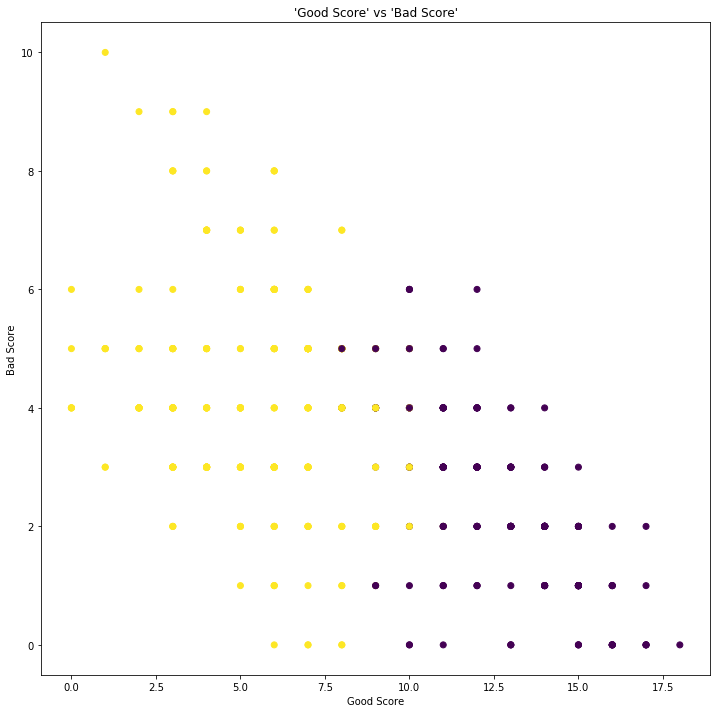

In [87]:
plt.figure(figsize=(12, 12))



plt.scatter(x = good_score, y = bad_score, c= list(kmeans.labels_))
plt.title("'Good Score' vs 'Bad Score'")
plt.xlabel('Good Score')
plt.ylabel('Bad Score')

In [116]:
matched_df['Label'] = kmeans.labels_

In [86]:
x_1 = list(variable_df['Address Match'])
x_2 = list(variable_df['Address Match'])

In [43]:
bad_things =[]
for thing in list(testy.columns):
    if thing not in good_things:
        bad_things.append(thing)
bad_things.remove('OFFICE_TELEPHONE')

In [50]:
bad_things

['Disconnected',
 'INF',
 'Low Quality',
 'Medium Quality',
 'No Address',
 'No Provider',
 'NO SIC',
 'No Date',
 'Possibly Portable VOIP',
 'Residential Phone',
 'Toll free',
 'Unknown Contact',
 'Unknown Phone Type',
 'Wireless note',
 'VOIP',
 'Name_No_Match_Google',
 'City_No_Match_Google',
 'State_No_Match_Google',
 'Workplace_No_Match_Google',
 'Address_No_Match_Google']

In [42]:
good_things = ['Address Match', 'Business Phone', 'City Match','Connected','First Name Match', 'High Quality', 'Last Name Match', 'Mailable', 'Ported','Relevant Name', 'Relevant SIC','State Match','Workplace Match', 'ZipCode Match','Name_Match_Google', 'City_Match_Google',
       'State_Match_Google', 'Workplace_Match_Google', 'Address_Match_Google']

In [44]:
good_score = 0
bad_score = 0
for thing in good_things:
    good_score += testy[thing]
for thing in bad_things:
    bad_score += testy[thing]

In [122]:
variable_df['Medium Quality'] = variable_df['Medium Quality']*0.5

In [59]:
attempt_1 = pd.DataFrame([good_score,bad_score]).transpose()

In [120]:
matched_df.to_csv('Investigate.csv')

In [128]:
good_things

['Address Match',
 'Business Phone',
 'City Match',
 'Connected',
 'First Name Match',
 'High Quality',
 'Last Name Match',
 'Mailable',
 'Ported',
 'Relevant Name',
 'Relevant SIC',
 'State Match',
 'Workplace Match',
 'ZipCode Match']

In [129]:
bad_things

['Disconnected',
 'INF',
 'Low Quality',
 'Medium Quality',
 'No Address',
 'No Provider',
 'NO SIC',
 'No Date',
 'Possibly Portable VOIP',
 'Residential Phone',
 'Toll free',
 'Unknown Contact',
 'Unknown Phone Type',
 'Wireless note',
 'VOIP',
 'Medium Quality']

In [27]:
ggl = pd.read_csv('Google_Variables.csv')

In [30]:
testy = pd.merge(variable_df, ggl, on= 'OFFICE_TELEPHONE').drop_duplicates()

In [33]:
testy.columns

Index(['OFFICE_TELEPHONE', 'Address Match', 'Business Phone', 'City Match',
       'Connected', 'Disconnected', 'First Name Match', 'High Quality', 'INF',
       'Last Name Match', 'Low Quality', 'Mailable', 'Medium Quality',
       'No Address', 'No Provider', 'NO SIC', 'No Date', 'Ported',
       'Possibly Portable VOIP', 'Relevant Name', 'Relevant SIC',
       'Residential Phone', 'State Match', 'Toll free', 'Unknown Contact',
       'Unknown Phone Type', 'Workplace Match', 'ZipCode Match',
       'Wireless note', 'VOIP', 'Name_Match_Google', 'City_Match_Google',
       'State_Match_Google', 'Workplace_Match_Google', 'Address_Match_Google',
       'Name_No_Match_Google', 'City_No_Match_Google', 'State_No_Match_Google',
       'Workplace_No_Match_Google', 'Address_No_Match_Google'],
      dtype='object')

In [54]:
good_score

0       1
1       7
2       3
3       8
4       4
       ..
508     8
509     7
510     3
511     9
512    13
Name: Address Match, Length: 495, dtype: int64

In [55]:
bad_score

0      5
1      3
2      3
3      5
4      4
      ..
508    5
509    2
510    4
511    4
512    3
Name: Disconnected, Length: 495, dtype: int64

In [78]:
matched_df

,PHYSICIAN_ME_NUMBER,PHYSICIAN_FIRST_NAME,PHYSICIAN_MIDDLE_NAME,PHYSICIAN_LAST_NAME,SUFFIX,DEGREE,OFFICE_ADDRESS_LINE_1,OFFICE_ADDRESS_LINE_2,OFFICE_ADDRESS_CITY,OFFICE_ADDRESS_STATE,...,Zipcode,City,State,PhoneType,QualityScore,Date,Notes,Provider,SICCode,SICDesc
0,4.706051e+09,EIMAN,None,JAHANGIR,None,None,CARDIOLOGY DEPARTMENT,1215 21ST AVE S,NASHVILLE,TN,...,None,None,None,RESIDENTIAL,MED,2013-11-17,"IsPorted,IsWireless",VERIZON WIRELESS-CA,None,None
1,4.814001e+09,SARAH,L,JONES,None,None,AUSTIN REGIONAL CLINIC,1807 W SLAUGHTER LN STE 490,AUSTIN,TX,...,78751,AUSTIN,TX,BUSINESS,MED,2003-12-11,"IsConnected,IsPorted",SOUTHWESTERN BELL,None,None
2,3.515961e+09,RACHAEL,None,GITTENS,None,None,CORNERSTONE OF MEDICAL ARTS CENTER,15905 UNION TPKE,FRESH MEADOWS,NY,...,11201,BROOKLYN,NY,BUSINESS,LOW,2017-02-01,IsPorted,CABLEVSN LGHTPATH NY,None,None
3,1.606781e+09,SCOTT,DAVID,GLAZER,None,None,KENOSHA DERMATOLOGY ASSOCIATES,3734 7TH ST STE 22,KENOSHA,WI,...,60089-2089,BUFFALO GROVE,IL,RESIDENTIAL,HIGH,2018-10-12,"IsMailable,IsConnected,IsPorted",COMCAST PHONE-IL,80110000,OFFICES AND CLINICS OF MEDICAL DOCTORS
4,3.509872e+09,GRACE,HELEN,THOMAS,None,None,AL DEPT OF PUBLIC HEALTH,201 MONROE ST STE 1382,MONTGOMERY,AL,...,36104,MONTGOMERY,AL,BUSINESS,LOW,None,None,BELLSOUTH SO CNTL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,7.480290e+10,MICHELLE,None,ABIS,None,None,# 1001,6511 SPRING BROOK AVE,RHINEBECK,NY,...,12572,RHINEBECK,NY,BUSINESS,LOW,2016-04-08,IsPorted,PAETEC COMM - NY,None,None
512,3.608111e+09,MATTHEW,LEIGHTON,DRAUGHON,None,None,# 104,3615 19TH ST,LUBBOCK,TX,...,79410-1230,LUBBOCK,TX,BUSINESS,LOW,2017-01-25,"IsMailable,IsPorted",TELEPORT COM DALLAS,None,None
513,4.201600e+09,JOSE,L,CANGIANO-RIVERA,None,None,URB LOS INGENIEROS,313 CALLE MANUEL DOMENECH STE 101,SAN JUAN,PR,...,00901,SAN JUAN,PR,RESIDENTIAL,LOW,2016-05-04,IsPorted,LIBERTY CABLEVSN-PR,None,None
514,3.844011e+09,ASLAM,MOHAMMED,KHAJA,None,None,RM 855N MC 796,912 S WOOD ST,CHICAGO,IL,...,60010-2542,LAKE BARRINGTON,IL,BUSINESS,HIGH,2013-12-06,"IsMailable,IsConnected,IsPorted","ACCESS ONE, INC IL",None,None


In [80]:
pd.read_csv('Add_Google_Results.csv')

,Unnamed: 0,PHYSICIAN_ME_NUMBER,PHYSICIAN_FIRST_NAME,PHYSICIAN_MIDDLE_NAME,PHYSICIAN_LAST_NAME,SUFFIX,DEGREE,OFFICE_ADDRESS_LINE_1,OFFICE_ADDRESS_LINE_2,OFFICE_ADDRESS_CITY,...,Notes,Provider,SICCode,SICDesc,Label,Google_Name,Google_Address,Google_Types,Google_Names,Google_Addresses
0,0,4.706051e+09,EIMAN,None,JAHANGIR,None,None,CARDIOLOGY DEPARTMENT,1215 21ST AVE S,NASHVILLE,...,"IsPorted,IsWireless",VERIZON WIRELESS-CA,None,None,1,None,None,None,[],[]
1,1,4.814001e+09,SARAH,L,JONES,None,None,AUSTIN REGIONAL CLINIC,1807 W SLAUGHTER LN STE 490,AUSTIN,...,"IsConnected,IsPorted",SOUTHWESTERN BELL,None,None,1,None,None,None,[],[]
2,2,3.515961e+09,RACHAEL,None,GITTENS,None,None,CORNERSTONE OF MEDICAL ARTS CENTER,15905 UNION TPKE,FRESH MEADOWS,...,IsPorted,CABLEVSN LGHTPATH NY,None,None,1,None,None,None,[],[]
3,3,1.606781e+09,SCOTT,DAVID,GLAZER,None,None,KENOSHA DERMATOLOGY ASSOCIATES,3734 7TH ST STE 22,KENOSHA,...,"IsMailable,IsConnected,IsPorted",COMCAST PHONE-IL,80110000,OFFICES AND CLINICS OF MEDICAL DOCTORS,0,"Dr. Michael H. Fretzin, MD","600 W Lake Cook Rd, Buffalo Grove, IL 60089, USA","['doctor', 'health', 'point_of_interest', 'est...","['Dr. Michael H. Fretzin, MD', 'Glazer Scott D...","['600 W Lake Cook Rd, Buffalo Grove, IL 60089,..."
4,4,3.509872e+09,GRACE,HELEN,THOMAS,None,None,AL DEPT OF PUBLIC HEALTH,201 MONROE ST STE 1382,MONTGOMERY,...,None,BELLSOUTH SO CNTL,None,None,1,None,None,None,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,511,7.480290e+10,MICHELLE,None,ABIS,None,None,# 1001,6511 SPRING BROOK AVE,RHINEBECK,...,IsPorted,PAETEC COMM - NY,None,None,1,"Health Quest Medical Practice - Primary Care, ...","6511 Spring Brook Ave, Rhinebeck, NY 12572, USA","['doctor', 'health', 'point_of_interest', 'est...",['Health Quest Medical Practice - Primary Care...,"['6511 Spring Brook Ave, Rhinebeck, NY 12572, ..."
495,512,3.608111e+09,MATTHEW,LEIGHTON,DRAUGHON,None,None,# 104,3615 19TH ST,LUBBOCK,...,"IsMailable,IsPorted",TELEPORT COM DALLAS,None,None,0,"Dr. Lawrence P. Elikan, MD","3615 19th St, Lubbock, TX 79410, USA","['doctor', 'health', 'point_of_interest', 'est...","['Dr. Lawrence P. Elikan, MD']","['3615 19th St, Lubbock, TX 79410, USA']"
496,513,4.201600e+09,JOSE,L,CANGIANO-RIVERA,None,None,URB LOS INGENIEROS,313 CALLE MANUEL DOMENECH STE 101,SAN JUAN,...,IsPorted,LIBERTY CABLEVSN-PR,None,None,1,None,None,None,[],[]
497,514,3.844011e+09,ASLAM,MOHAMMED,KHAJA,None,None,RM 855N MC 796,912 S WOOD ST,CHICAGO,...,"IsMailable,IsConnected,IsPorted","ACCESS ONE, INC IL",None,None,0,"Dr. Manisha Sahay, MD","22285 N Pepper Rd #401, Barrington, IL 60010, USA","['doctor', 'health', 'point_of_interest', 'est...","['Dr. Manisha Sahay, MD', 'Jackson Lisa R', 'B...","['22285 N Pepper Rd #401, Barrington, IL 60010..."


In [81]:
testyy

,Address Match,Business Phone,City Match,Connected,Disconnected,First Name Match,High Quality,INF,Last Name Match,Low Quality,...,Name_Match_Google,City_Match_Google,State_Match_Google,Workplace_Match_Google,Address_Match_Google,Name_No_Match_Google,City_No_Match_Google,State_No_Match_Google,Workplace_No_Match_Google,Address_No_Match_Google
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,1,0,...,1,0,0,0,0,0,1,1,1,1
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,1,1,0,0,0,0,0,0,1,...,0,1,1,0,1,1,0,0,1,0
509,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
511,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,1
